In [33]:
from tracemalloc import Snapshot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [38]:
train = train.dropna()
test = test.dropna()

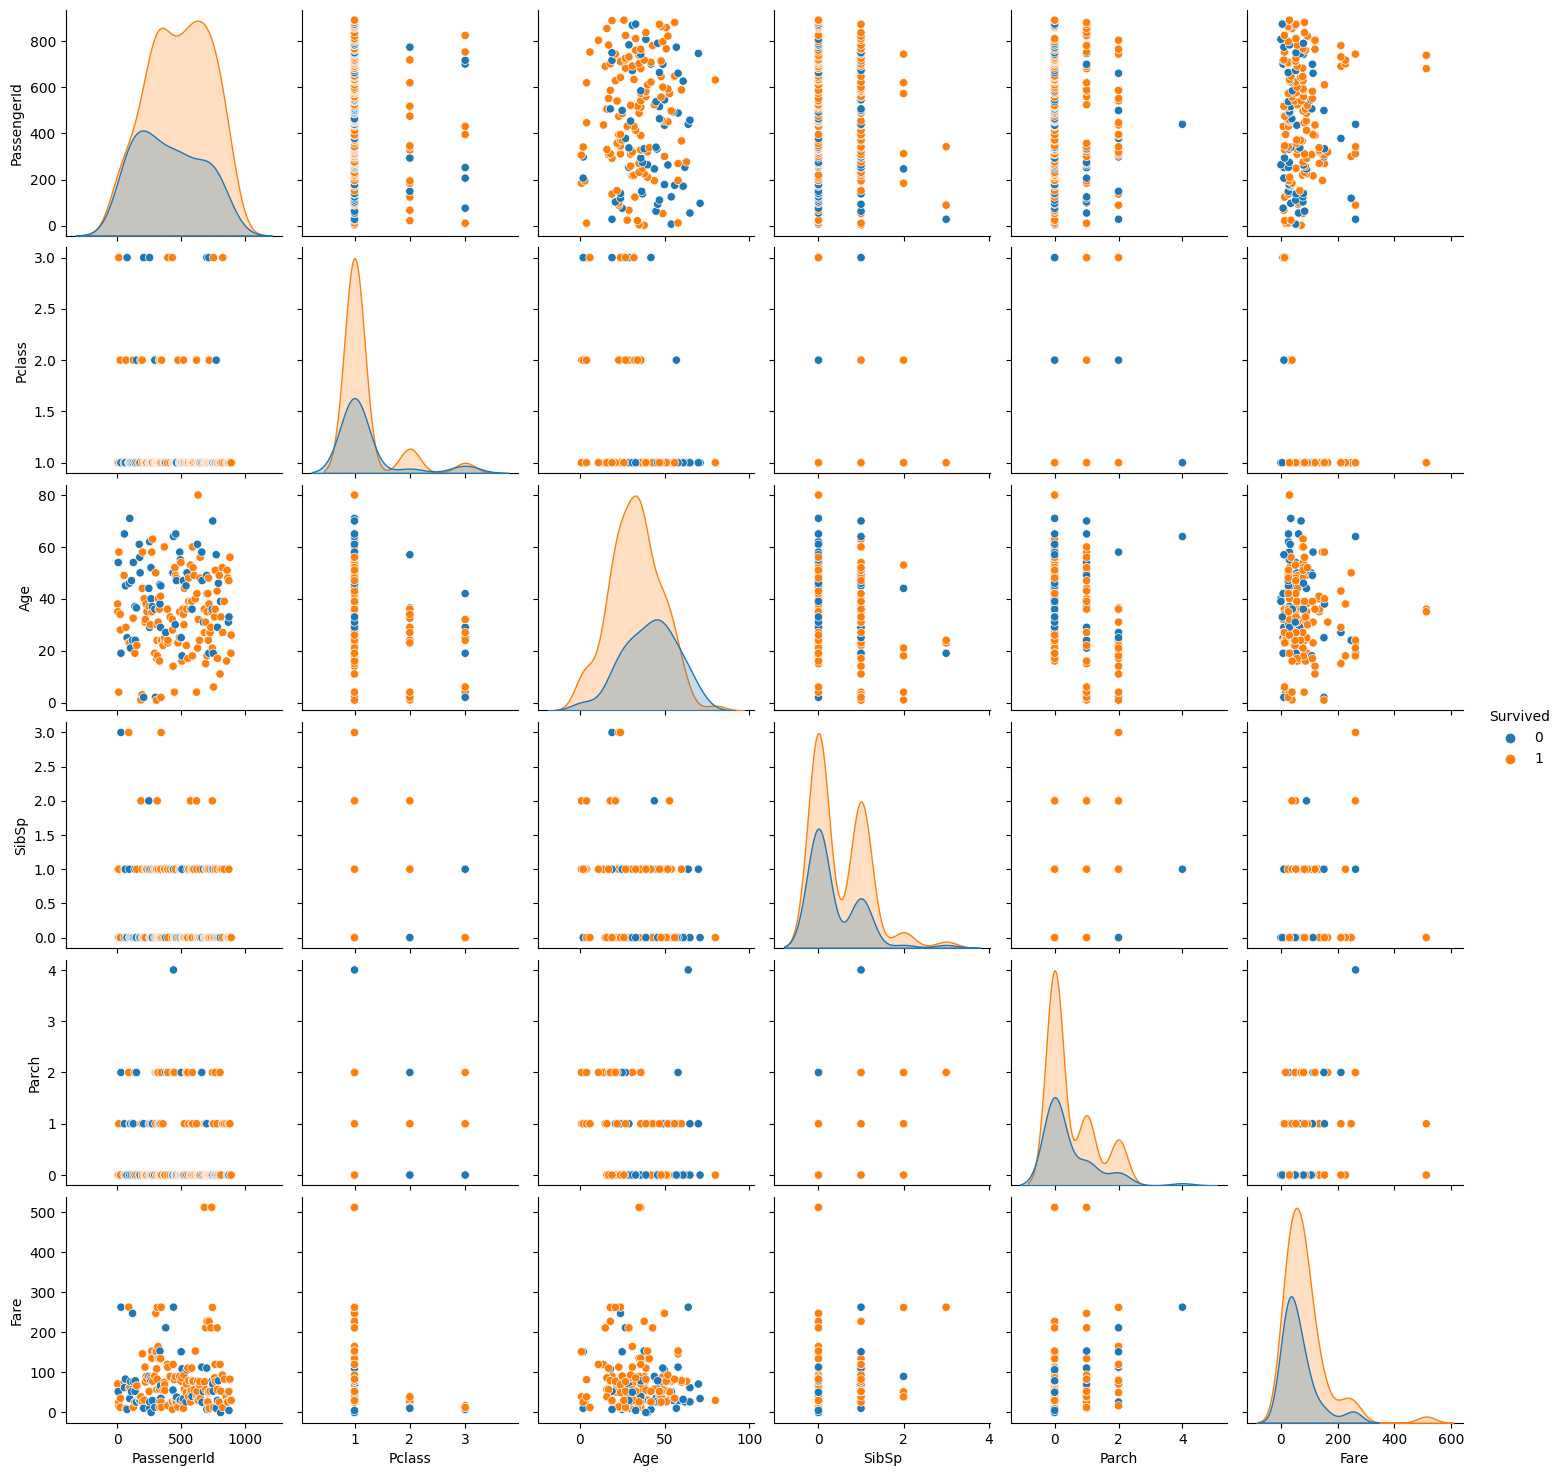

In [39]:
sns.pairplot(train, hue="Survived")

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train[['Pclass','Age','SibSp','Parch','Fare']], train['Survived'])
test['cfc_predict'] = clf.predict(test[['Pclass','Age','SibSp','Parch','Fare']])
test

In [51]:
from sklearn.cluster import KMeans
kmeans_test = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
test['KMeans_predict'] = kmeans_test.fit_predict(test[['Pclass','Age','SibSp','Parch','Fare']])

kmeans_train = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
train['KMeans_predict'] = kmeans_train.fit_predict(train[['Pclass','Age','SibSp','Parch','Fare']])

/tmp/ipykernel_101513/3782765556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['KMeans_predict'] = kmeans_train.fit_predict(train[['Pclass','Age','SibSp','Parch','Fare']])


In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
test['Naive_Bayes_predict'] = gnb.fit(train[['Pclass','Age','SibSp','Parch','Fare']], train['Survived']).predict(test[['Pclass','Age','SibSp','Parch','Fare']])

In [54]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cfc_predict,KMeans_predict,Naive_Bayes_predict
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,1,0,1
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1,0,1
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1,1,1
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,1,0,1
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,1,0,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,1,0,1
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,1,1,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,0,1
